# Text Processing

## Capturing Text Data

### Plain Text

In [1]:
import os

# Read in a plain text file
with open(os.path.join("data", "hieroglyph.txt"), "r") as f:
    text = f.read()
    print(text)

import os
os.listdir("data")

Hieroglyphic writing dates from c. 3000 BC, and is composed of hundreds of symbols. A hieroglyph can represent a word, a sound, or a silent determinative; and the same symbol can serve different purposes in different contexts. Hieroglyphs were a formal script, used on stone monuments and in tombs, that could be as detailed as individual works of art.



['apple.txt',
 'game-theory.txt',
 'hieroglyph.txt',
 'house-with-chimaeras.txt',
 'imdb-reviews',
 'kingfisher.txt',
 'news.csv']

### Tabular Data

In [2]:
import pandas as pd

# Extract text column from a dataframe
df = pd.read_csv(os.path.join("data", "news.csv"))
df.head()[['publisher', 'title']]

# Convert text column to lowercase
df['title'] = df['title'].str.lower()
df.head()[['publisher', 'title']]

,publisher,title
0,Livemint,fed's charles plosser sees high bar for change...
1,IFA Magazine,us open: stocks fall after fed official hints ...
2,IFA Magazine,"fed risks falling 'behind the curve', charles ..."
3,Moneynews,fed's plosser: nasty weather has curbed job gr...
4,NASDAQ,plosser: fed may have to accelerate tapering pace


### Online Resource

In [3]:
import requests
import json

# Fetch data from a REST API
r = requests.get(
    "https://quotes.rest/qod.json")
res = r.json()
print(json.dumps(res, indent=4))

# Extract relevant object and field
q = res["contents"]["quotes"][0]
print(q["quote"], "\n--", q["author"])

{
    "success": {
        "total": 1
    },
    "contents": {
        "quotes": [
            {
                "quote": "When you win, say nothing. When you lose, say less.",
                "author": "Paul Brown",
                "length": "51",
                "tags": [
                    "inspire",
                    "losing",
                    "running",
                    "winning"
                ],
                "category": "inspire",
                "title": "Inspiring Quote of the day",
                "date": "2018-05-09",
                "id": null
            }
        ],
        "copyright": "2017-19 theysaidso.com"
    }
}
When you win, say nothing. When you lose, say less. 
-- Paul Brown


## Cleaning

In [4]:
import requests

# Fetch a web page
r = requests.get("https://www.udacity.com/courses/all")
print(r.text)

<!DOCTYPE html><html><head><meta charset="utf-8"><title>Udacity</title><base href="/"><meta name="viewport" content="width=device-width,initial-scale=1"><link rel="icon" type="image/x-icon" href="favicon.ico"><script src="assets/vendor/segment.js" async="" data-analytics-bootstrap=""></script><link rel="preload" href="inline.509e7550cbef835fb4dc.bundle.js" as="script"><link rel="preload" href="polyfills.e4209dc4ee404edc7298.bundle.js" as="script"><link rel="preload" href="main.ca0ca784ef374e7e1df2.bundle.js" as="script"><link href="styles.4f181499f8401304f50e.bundle.css" rel="stylesheet"><style ng-transition="iridium-us">html[_ngcontent-c0]{-webkit-box-sizing:border-box;box-sizing:border-box}*[_ngcontent-c0], [_ngcontent-c0]:after, [_ngcontent-c0]:before{-webkit-box-sizing:inherit;box-sizing:inherit}a[_ngcontent-c0]{color:#9400d3}body[_ngcontent-c0]{color:#028bb1}[_nghost-c0]{display:block;position:relative}</style><style ng-transition="iridium-us">html[_ngcontent-c1]{-webkit-box-sizin

In [5]:
import re

# Remove HTML tags using RegEx
pattern = re.compile(r'<.*?>')  # tags look like <...>
print(pattern.sub('', r.text))  # replace them with blank

Udacityhtml[_ngcontent-c0]{-webkit-box-sizing:border-box;box-sizing:border-box}*[_ngcontent-c0], [_ngcontent-c0]:after, [_ngcontent-c0]:before{-webkit-box-sizing:inherit;box-sizing:inherit}a[_ngcontent-c0]{color:#9400d3}body[_ngcontent-c0]{color:#028bb1}[_nghost-c0]{display:block;position:relative}html[_ngcontent-c1]{-webkit-box-sizing:border-box;box-sizing:border-box}*[_ngcontent-c1], [_ngcontent-c1]:after, [_ngcontent-c1]:before{-webkit-box-sizing:inherit;box-sizing:inherit}.invisible[_ngcontent-c1]{visibility:hidden!important}.hide[_ngcontent-c1]{display:none!important}.show[_ngcontent-c1]{display:block!important}.sr-only[_ngcontent-c1]{height:1px;width:1px;overflow:hidden;position:absolute!important;clip:rect(1px,1px,1px,1px)}.hidden-xs-up[_ngcontent-c1]{display:none!important}@media (max-width:479px){.hidden-xs-down[_ngcontent-c1]{display:none!important}}@media (min-width:480px){.hidden-sm-up[_ngcontent-c1]{display:none!important}}@media (max-width:767px){.hidden-sm-down[_ngconten

In [6]:
from bs4 import BeautifulSoup

# Remove HTML tags using Beautiful Soup library
soup = BeautifulSoup(r.text, "html5lib")
print(soup.get_text())

Udacityhtml[_ngcontent-c0]{-webkit-box-sizing:border-box;box-sizing:border-box}*[_ngcontent-c0], [_ngcontent-c0]:after, [_ngcontent-c0]:before{-webkit-box-sizing:inherit;box-sizing:inherit}a[_ngcontent-c0]{color:#9400d3}body[_ngcontent-c0]{color:#028bb1}[_nghost-c0]{display:block;position:relative}html[_ngcontent-c1]{-webkit-box-sizing:border-box;box-sizing:border-box}*[_ngcontent-c1], [_ngcontent-c1]:after, [_ngcontent-c1]:before{-webkit-box-sizing:inherit;box-sizing:inherit}.invisible[_ngcontent-c1]{visibility:hidden!important}.hide[_ngcontent-c1]{display:none!important}.show[_ngcontent-c1]{display:block!important}.sr-only[_ngcontent-c1]{height:1px;width:1px;overflow:hidden;position:absolute!important;clip:rect(1px,1px,1px,1px)}.hidden-xs-up[_ngcontent-c1]{display:none!important}@media (max-width:479px){.hidden-xs-down[_ngcontent-c1]{display:none!important}}@media (min-width:480px){.hidden-sm-up[_ngcontent-c1]{display:none!important}}@media (max-width:767px){.hidden-sm-down[_ngconten

In [7]:
# Find all course summaries
summaries = soup.find_all("div")
if len(summaries)>0:
    summaries[0]
else:
    print("no summary")
    
#looks like the called page is different than the lesson...breaking this section


In [8]:
# Extract title
summaries[0].select_one("h3 a").get_text().strip()

AttributeError: 'NoneType' object has no attribute 'get_text'

In [ ]:
# Extract description
summaries[0].select_one("div[data-course-short-summary]").get_text().strip()

In [ ]:
# Find all course summaries, extract title and description
courses = []
summaries = soup.find_all("div", class_="course-summary-card")
for summary in summaries:
    title = summary.select_one("h3 a").get_text().strip()
    description = summary.select_one("div[data-course-short-summary]").get_text().strip()
    courses.append((title, description))

print(len(courses), "course summaries found. Sample:")
print(courses[0][0])
print(courses[0][1])

## Normalization

### Case Normalization

In [9]:
# Sample text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"
print(text)

The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?


In [10]:
# Convert to lowercase
text = text.lower() 
print(text)

the first time you see the second renaissance it may look boring. look at it at least twice and definitely watch part 2. it will change your view of the matrix. are the human people the ones who started the war ? is ai a bad thing ?


### Punctuation Removal

In [11]:
import re

# Remove punctuation characters
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

the first time you see the second renaissance it may look boring  look at it at least twice and definitely watch part 2  it will change your view of the matrix  are the human people the ones who started the war   is ai a bad thing  


## Tokenization

In [12]:
# Split text into tokens (words)
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


### NLTK: Natural Language ToolKit

In [13]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\llathrop\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\llathrop\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\llathrop\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\llathrop\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\llathrop\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to

True

In [14]:
# Another sample text
text = "Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers."
print(text)

Dr. Smith graduated from the University of Washington. He later started an analytics firm called Lux, which catered to enterprise customers.


In [15]:
from nltk.tokenize import word_tokenize

# Split text into words using NLTK
words = word_tokenize(text)
print(words)

['Dr.', 'Smith', 'graduated', 'from', 'the', 'University', 'of', 'Washington', '.', 'He', 'later', 'started', 'an', 'analytics', 'firm', 'called', 'Lux', ',', 'which', 'catered', 'to', 'enterprise', 'customers', '.']


In [16]:
from nltk.tokenize import sent_tokenize

# Split text into sentences
sentences = sent_tokenize(text)
print(sentences)

['Dr. Smith graduated from the University of Washington.', 'He later started an analytics firm called Lux, which catered to enterprise customers.']


In [17]:
# List stop words
from nltk.corpus import stopwords
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
# Reset text
text = "The first time you see The Second Renaissance it may look boring. Look at it at least twice and definitely watch part 2. It will change your view of the matrix. Are the human people the ones who started the war ? Is AI a bad thing ?"

# Normalize it
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())

# Tokenize it
words = text.split()
print(words)

['the', 'first', 'time', 'you', 'see', 'the', 'second', 'renaissance', 'it', 'may', 'look', 'boring', 'look', 'at', 'it', 'at', 'least', 'twice', 'and', 'definitely', 'watch', 'part', '2', 'it', 'will', 'change', 'your', 'view', 'of', 'the', 'matrix', 'are', 'the', 'human', 'people', 'the', 'ones', 'who', 'started', 'the', 'war', 'is', 'ai', 'a', 'bad', 'thing']


In [19]:
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'ones', 'started', 'war', 'ai', 'bad', 'thing']


## Part-of-Speech Tagging

In [20]:
from nltk import pos_tag

# Tag parts of speech (PoS)
sentence = word_tokenize("I always lie down to tell a lie.")
pos_tag(sentence)

[('I', 'PRP'),
 ('always', 'RB'),
 ('lie', 'VBP'),
 ('down', 'RP'),
 ('to', 'TO'),
 ('tell', 'VB'),
 ('a', 'DT'),
 ('lie', 'NN'),
 ('.', '.')]

### Sentence Parsing

In [21]:
import nltk

# Define a custom grammar
my_grammar = nltk.CFG.fromstring("""
S -> NP VP
PP -> P NP
NP -> Det N | Det N PP | 'I'
VP -> V NP | VP PP
Det -> 'an' | 'my'
N -> 'elephant' | 'pajamas'
V -> 'shot'
P -> 'in'
""")
parser = nltk.ChartParser(my_grammar)

# Parse a sentence
sentence = word_tokenize("I shot an elephant in my pajamas")
for tree in parser.parse(sentence):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


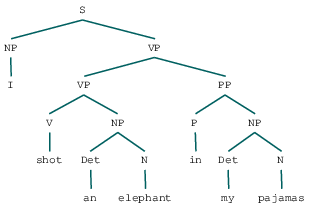

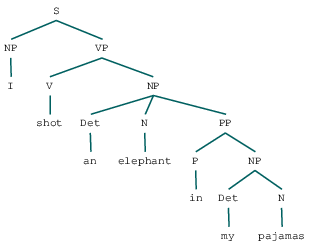

In [23]:
import IPython  # for displaying parse trees inline

# Visualize parse trees
for tree in parser.parse(sentence):
    IPython.display.display(tree)  # instead of tree.draw()

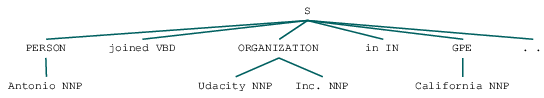

In [24]:
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize

# Recognize named entities in a tagged sentence
tree = ne_chunk(pos_tag(word_tokenize("Antonio joined Udacity Inc. in California.")))
IPython.display.display(tree)

## Stemming & Lemmatization

### Stemming

In [25]:
from nltk.stem.porter import PorterStemmer

# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['first', 'time', 'see', 'second', 'renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definit', 'watch', 'part', '2', 'chang', 'view', 'matrix', 'human', 'peopl', 'one', 'start', 'war', 'ai', 'bad', 'thing']


### Lemmatization

In [26]:
from nltk.stem.wordnet import WordNetLemmatizer

# Reduce words to their root form
lemmed = [WordNetLemmatizer().lemmatize(w) for w in words]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'started', 'war', 'ai', 'bad', 'thing']


In [27]:
# Lemmatize verbs by specifying pos
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in lemmed]
print(lemmed)

['first', 'time', 'see', 'second', 'renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice', 'definitely', 'watch', 'part', '2', 'change', 'view', 'matrix', 'human', 'people', 'one', 'start', 'war', 'ai', 'bad', 'thing']
